In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6.4*4,4.8*2.5)
plt.rcParams["font.size"] = 20

import numpy as np
from scipy import special
import util

In [52]:
def plot_excitation_signal(s1, s2, title='', unwrap=False):
	fig, axs = plt.subplots(2,2)
	#fig.suptitle(title)
	fig.set_tight_layout(True)
	axts = axs[0, 0]
	axts2 = axs[1, 0]
	axmag = axs[0, 1]
	axphase = axs[1, 1]

	axts.set_title('Time Series - Full Power')
	axts2.set_title('Time Series - Time limited')
	ts1 = np.fft.ifftshift(s1[0] / np.pi)
	ts2 = np.fft.ifftshift(s2[0] / np.pi)
	axts.plot(np.real(ts1), marker='o', label='real')
	axts.plot(np.imag(ts1), marker='o', alpha=0.3, label='imaginary')
	axts2.plot(np.real(ts2), marker='o', label='real')
	axts2.plot(np.imag(ts2), marker='o', alpha=0.3, label='imaginary')
	axts2.legend()
	axts.legend()
	#checkfft = np.fft.fft(sig, norm="ortho")
#	axmag.plot(np.abs(checkfft), marker='o')
	axmag.set_title('Amplitude Response')
	U = s1[1]
	axmag.plot(np.abs(U)[:U.size//2], marker='o')

	phase = np.angle(U)[:U.size//2]
	if unwrap:
		axphase.plot(util.unwrap_spectral_phase(phase), marker='o')
	else:
		axphase.plot(phase, marker='o')
	axphase.axvline(x=len(phase) // 2)
	axphase.set_title('Unwrapped Phase')
	fig.savefig(f'excitation_{title}.svg')


In [53]:
def periodic_noise(N, timelimited=False, process=None, seed=10):
    if process is None:
        process = np.random.default_rng(seed)

    odd = 0 if N % 2 else 1
    N2 = (N-odd) // 2
    k = process.integers(low=1, high=N2, size=N2-2)

    pspec = k / N * np.exp(1j * 2 * np.pi * k / N2)
    nspec = np.conj(np.flip(pspec))
    if timelimited:
        spectrum = np.concatenate((pspec, np.zeros(1), nspec))
    else:
        spectrum = np.concatenate((np.zeros(1), pspec, nspec))

    u = np.fft.ifft(spectrum, norm="ortho")
    return 2*u, spectrum


In [54]:
def random_phase_multisine(N, timelimited=False, process=None, seed=10):
    if process is None:
        process = np.random.default_rng(seed)

    spectrum = None

    odd = 0 if N % 2 else 1
    N2 = (N-odd) // 2
    k = process.integers(low=1, high=N2-1, size=N2-2)

    pspec = np.exp(1j * 2 * np.pi * k / N2)
    nspec = np.conj(np.flip(pspec))
    if timelimited:
        spectrum = np.concatenate((pspec, np.zeros(1), nspec))
    else:
        spectrum = np.concatenate((np.zeros(1), pspec, nspec))

    u = np.fft.ifft(spectrum, norm="ortho")
    return u, spectrum

In [55]:
def chirp(N, timelimited=False, transform='linear', process=None):
    spectrum = None

    odd = 0 if N % 2 else 1
    N2 = (N-odd) // 2
    phase = np.linspace(1, N2, N2)

    #phase = np.arange(1, N2-1)
    if transform == 'linear':
        #phase = np.arange(1, N2, 2)
        k = -phase*(phase - 1)
    else:
        phase = np.arange(1, N2, 1)
        k = phase / 2

    pspec = np.exp(1j * 2 * np.pi * -k / N)
    nspec = np.conj(np.flip(pspec))
    if timelimited:
        spectrum = np.concatenate((pspec,np.zeros(1), nspec))
    else:
        spectrum = np.concatenate(([1],pspec, nspec))
        #spectrum = np.concatenate((pspec, np.zeros(2), nspec))
    #else:
        #spectrum = np.concatenate((np.zeros(2), pspec, nspec))

    u = np.fft.ifft(spectrum, norm="ortho")
    return u, spectrum

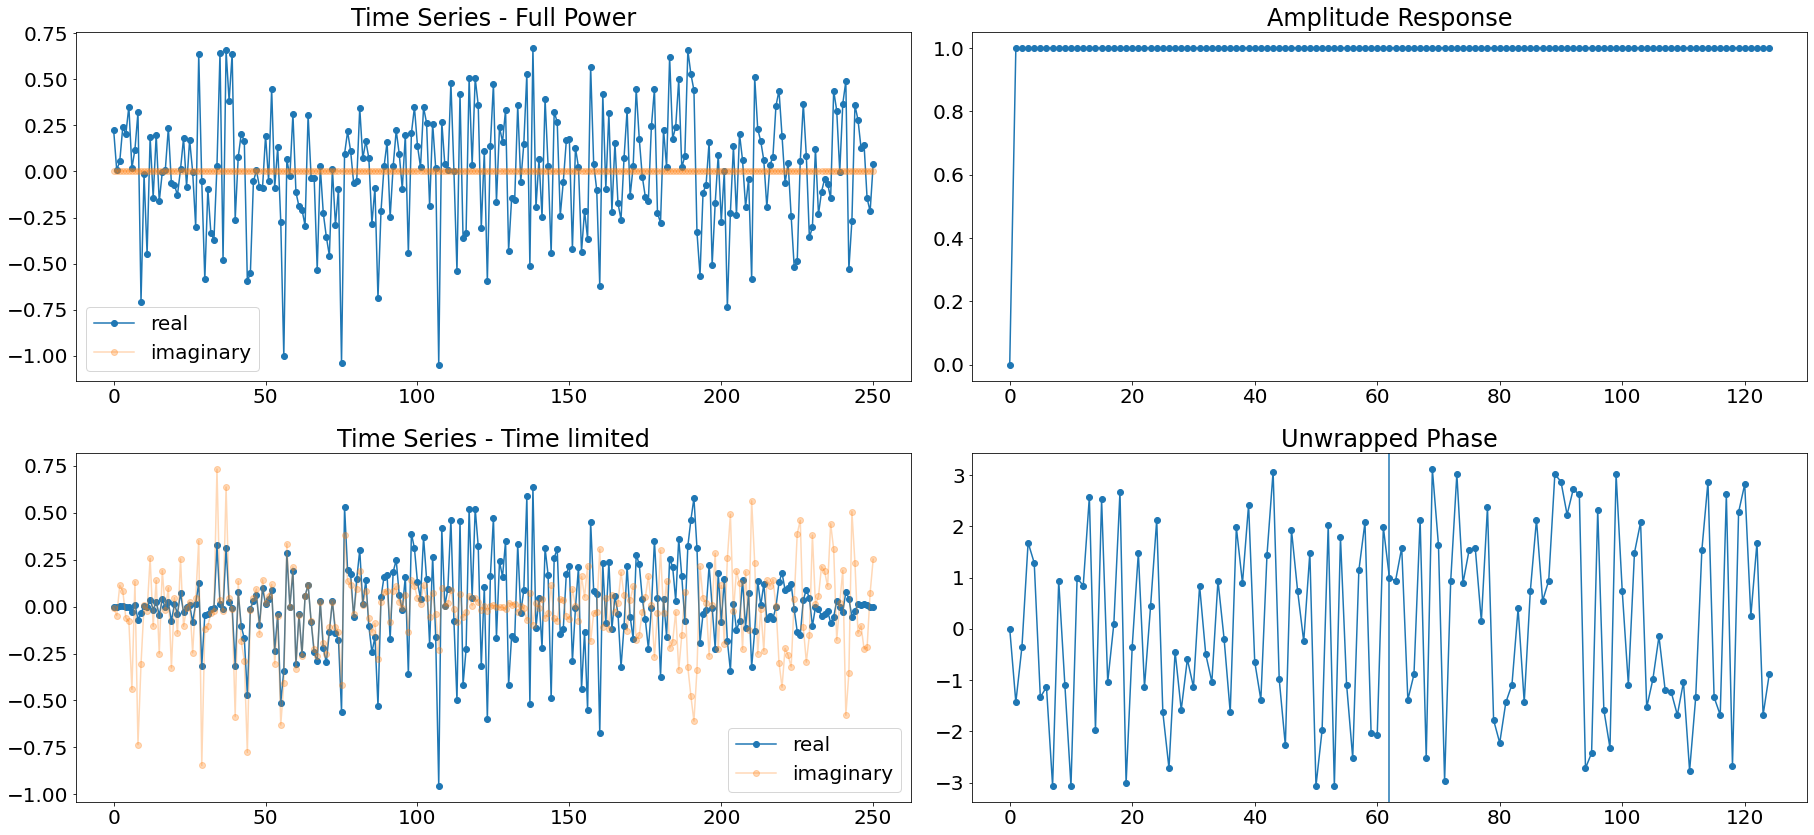

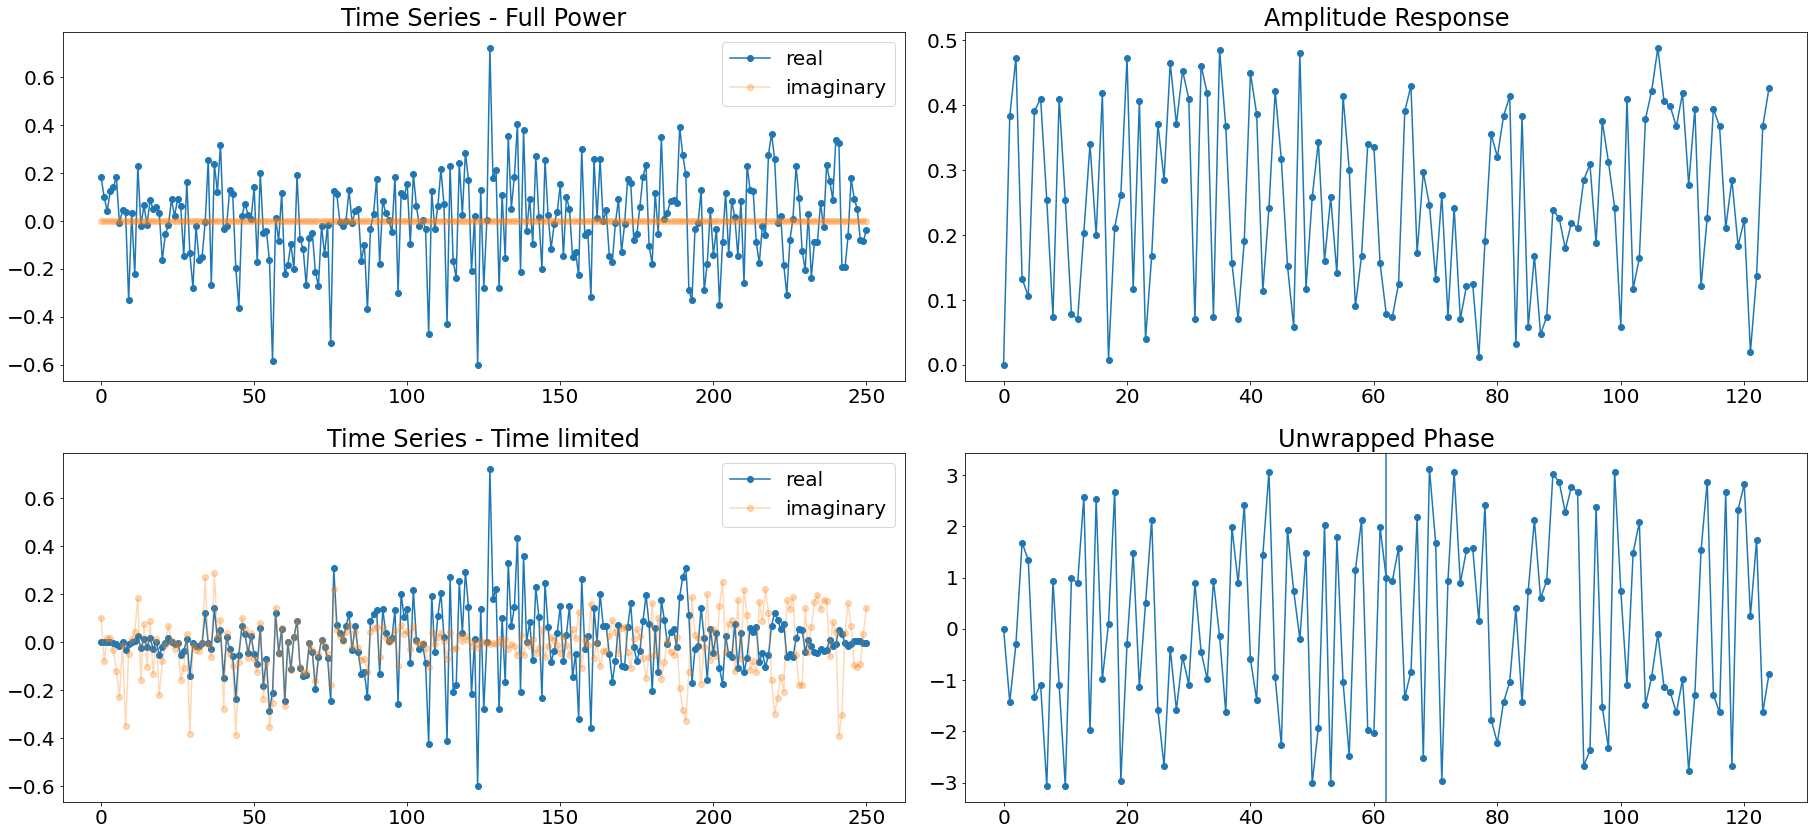

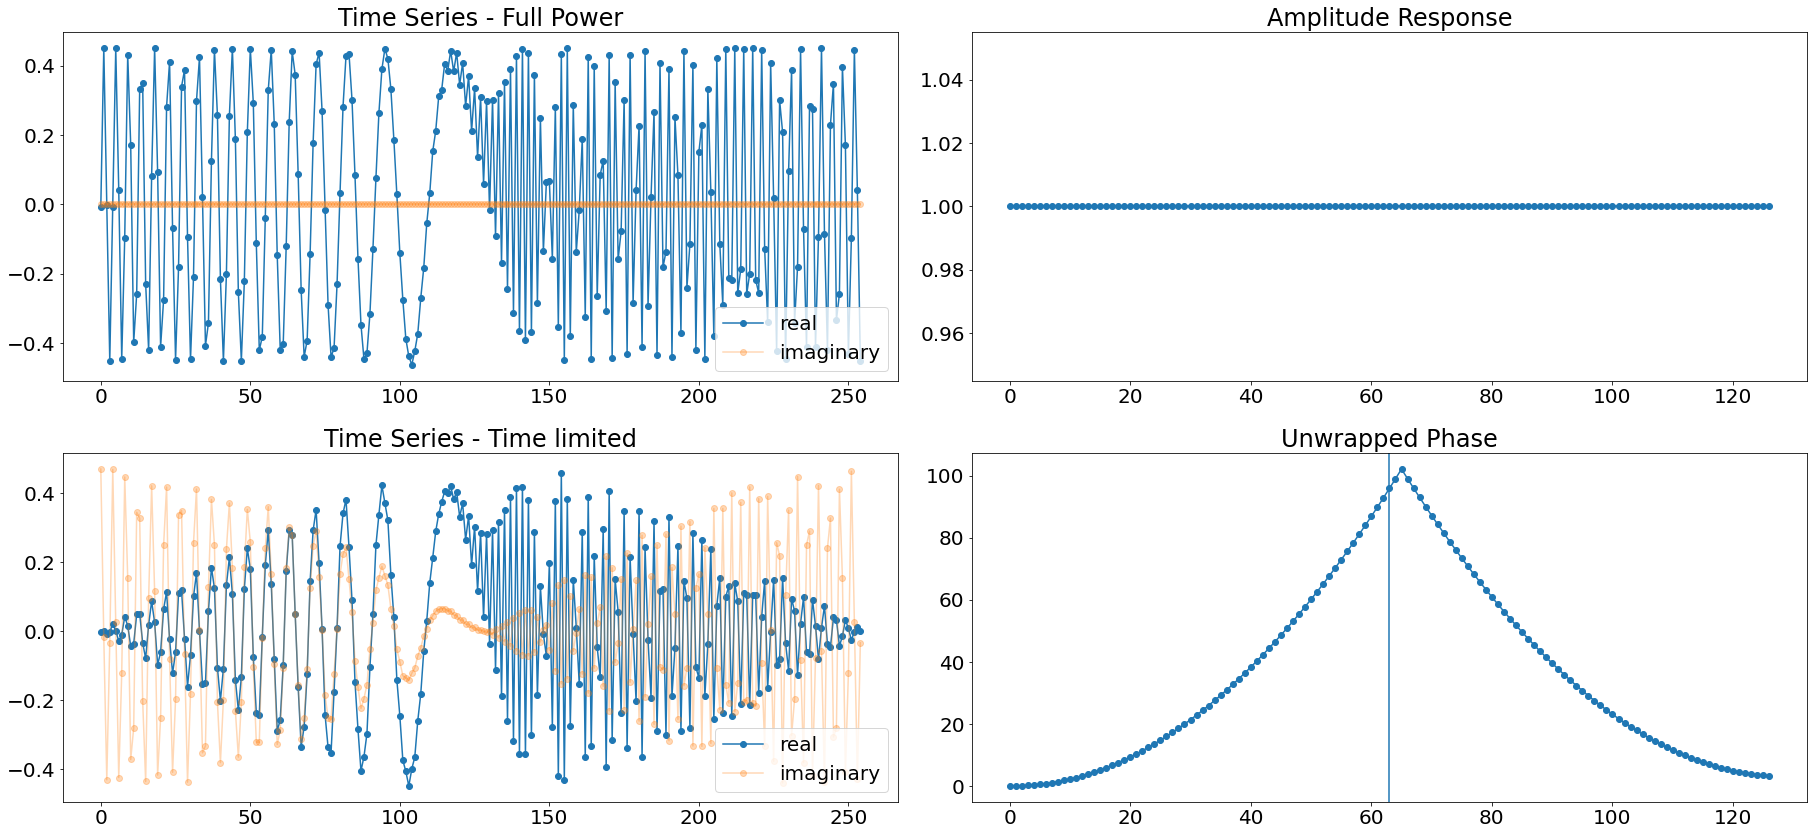

In [56]:
N = 256
s11 = random_phase_multisine(N)
s12 = random_phase_multisine(N, timelimited=True)
# periodic noise
s21 = periodic_noise(N)
s22 = periodic_noise(N, timelimited=True)
s31 = chirp(N)
s32 = chirp(N, timelimited=True)

plot_excitation_signal(s11, s12, 'White Noise')
plot_excitation_signal(s21, s22, 'Periodic Noise')
plot_excitation_signal(s31, s32, 'Quadratic Chirp', True)


(100, 1000)


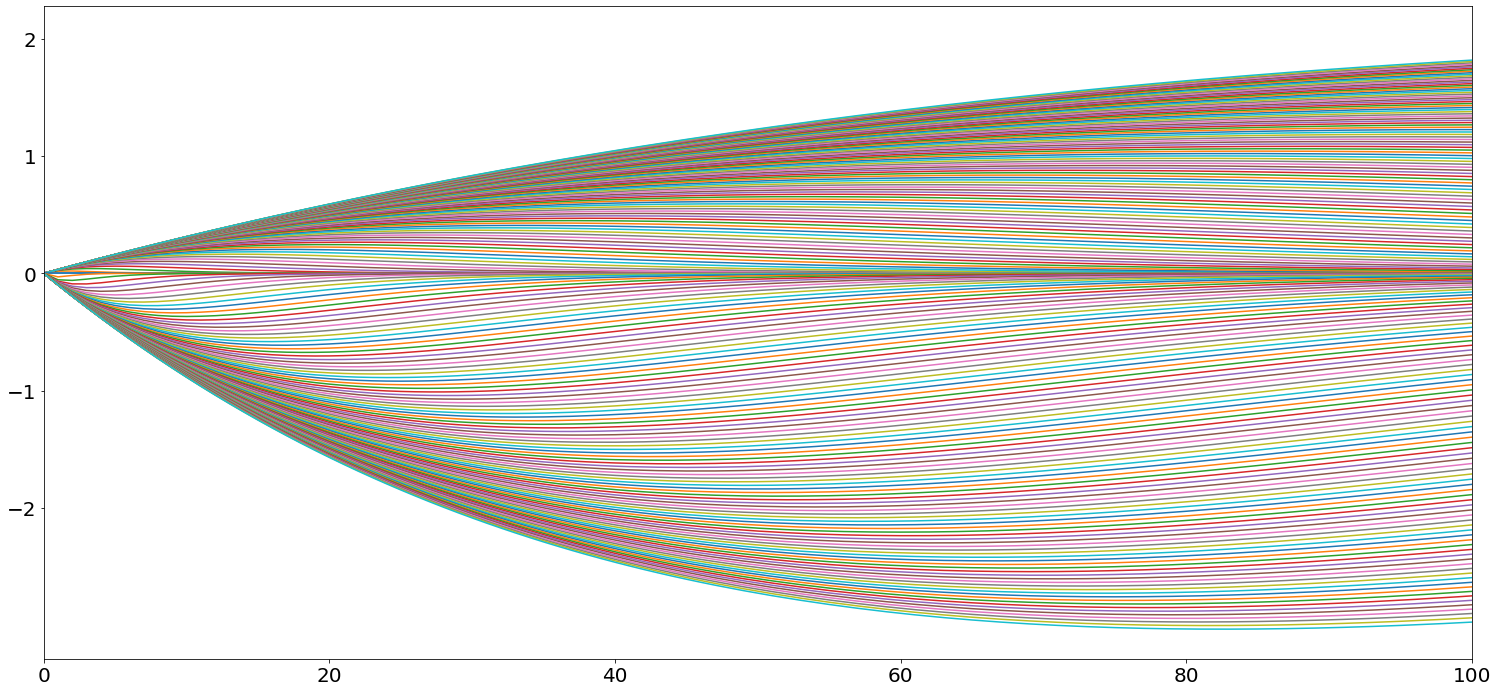

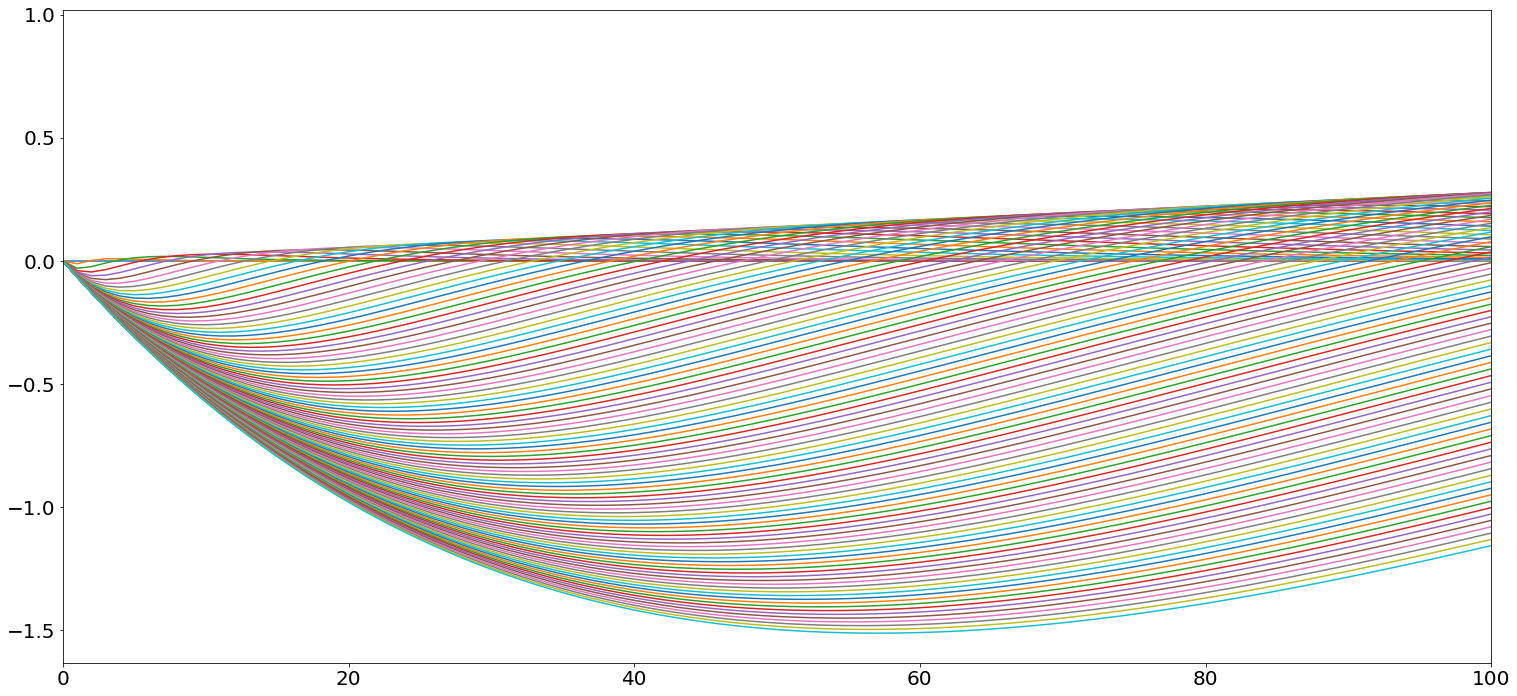

In [57]:
t = np.linspace(0.0001, 100, 1000)
expfamily = np.zeros((100, 1000))
negfamily = np.zeros((100, 1000))
print(expfamily.shape)
for sig in range(1, 100):
	expfamily[sig,:] = 1/3*t*np.exp(-6*t/sig)
	negfamily[sig,:] = -t*np.exp(-12*t/sig)


#plt.xlim(0, )
plt.yticks((4, 2, 1, 0, -1, -2, -4))
#plt.ylim(0, 1)
plt.plot(expfamily.T)
#plt.figure()
plt.xlim(0, 100)
#plt.yticks((0, 1))
plt.plot(negfamily.T)
plt.figure()
tranfamily = negfamily+expfamily
plt.plot(tranfamily.T)
#plt.yticks((-1, -2, 0, 0.5, 1, np.max(tranfamily, axis=1)[0]))
#plt.ylim(0, 1)
plt.xlim(0, 100)
pass

(100, 1000)


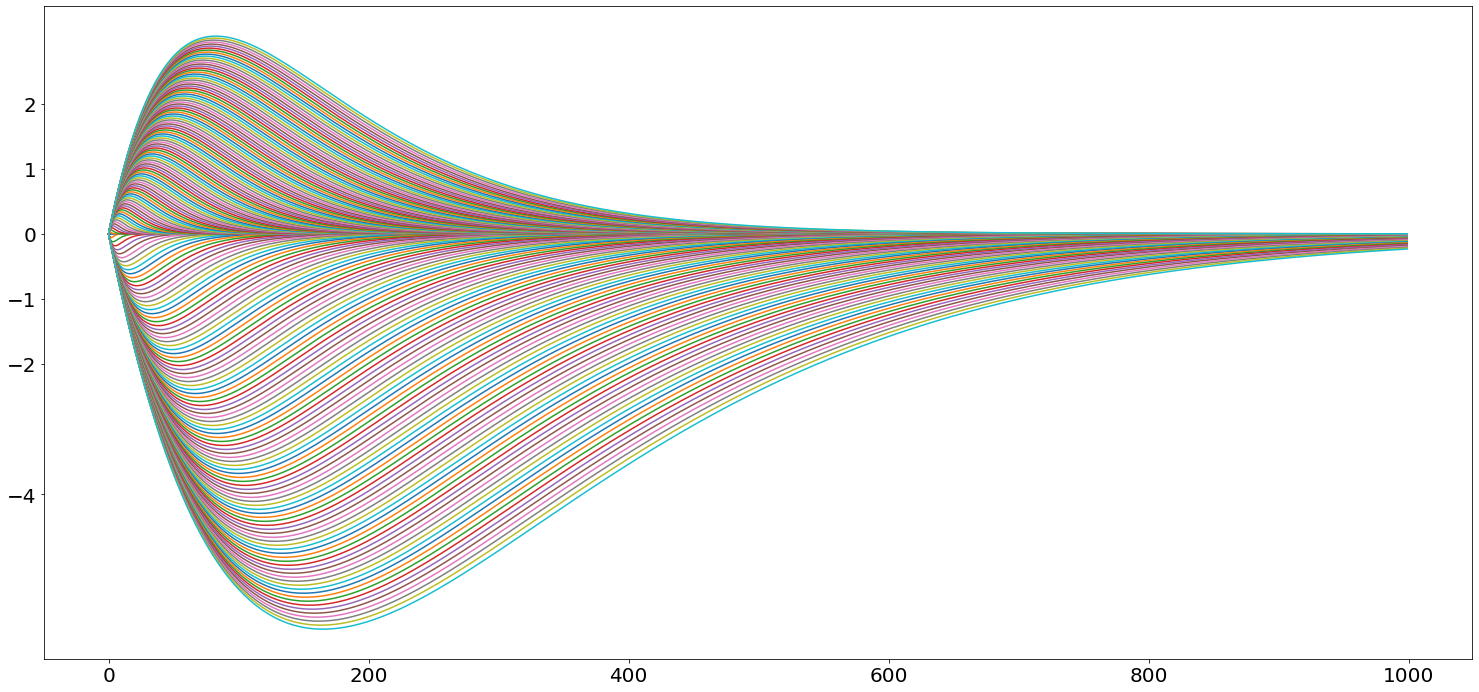

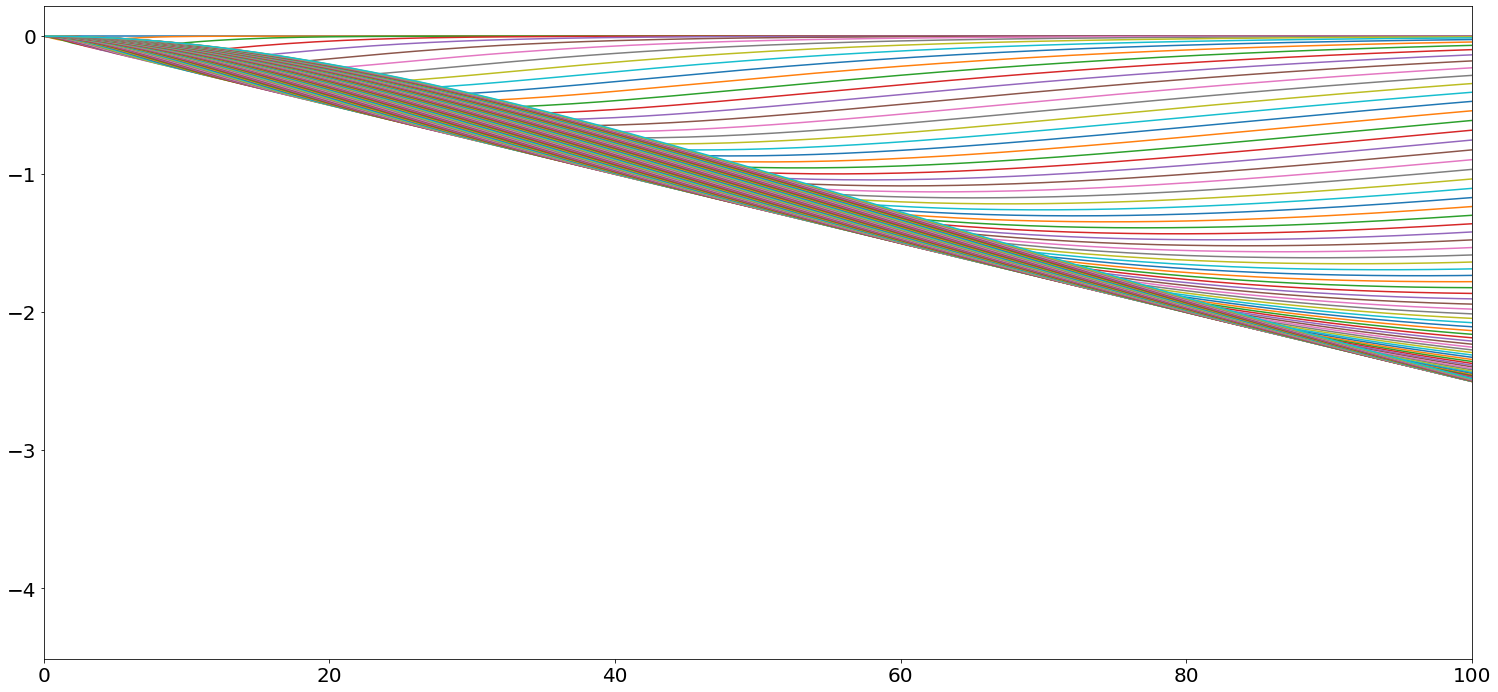

In [58]:
ly = np.zeros((100, 1000))
negfamily = np.zeros((100, 1000))
print(expfamily.shape)
for sig in range(1, 100):
	expfamily[sig,:] = -t*np.exp(-6*t/sig)
	negfamily[sig,:] = t*np.exp(-12*t/sig)
	#expfamily[sig,:] = 1/2*t*np.exp(-t/12*sig)
	#negfamily[sig,:] = -t*np.exp(-t/6*sig)


#plt.xlim(0, )
plt.yticks((4, 2, 1, 0, -1, -2, -4))
#plt.ylim(0, 1)
plt.plot(expfamily.T)
#plt.figure()
#plt.xlim(0, 200)
#plt.ylim(-1, 1)
#plt.yticks((0, 1))
plt.plot(negfamily.T)
plt.figure()
tranfamily = negfamily+expfamily
plt.plot(tranfamily.T)
#plt.yticks((-1, -2, 0, 0.5, 1, np.max(tranfamily, axis=1)[0]))
#plt.ylim(0, 1)
plt.xlim(0, 100)
pass